In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
def shift_df(df, sequence_length):
    df2 = df.copy()
    try:
        df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'])
        df2.set_index('InvoiceDate')
    except:
        print("Cannot set 'InvoiceDate' as index")
    
    # create shifted columns
    for f in df2.columns:
        for i in range(1, sequence_length+1):
            df2[f'{f}(t-{i})'] = df2[f].shift(i)


    # drop NaN rows
    df2.dropna(inplace=True)

    return df2

def create_sequences(df, sequence_length, prediction_window = 1):
    """
    Generates input and target sequences from a DataFrame to prepare data for training RNN models.
    
    This function creates overlapping sequences of a specified length from a DataFrame,
    where each sequence is used as input for RNN predictions. The targets are determined
    by the prediction_window, allowing for both many-to-one and many-to-many predictions.

    Parameters:
    df (pd.DataFrame): DataFrame containing sequential data. Each row is expected to be 
                       a time step in the sequence.
    sequence_length (int): The number of time steps in each input sequence.
    prediction_window (int, optional): The number of future time steps to predict. A value of
                                       1 indicates a many-to-one prediction, while a value greater
                                       than 1 indicates a many-to-many prediction.

    Returns:
    np.ndarray: An array of input sequences.
    np.ndarray: An array of targets corresponding to the sequences. Targets can be a single
                time step or a sequence of time steps, depending on the prediction_window.
    """
    
    sequences = []
    targets = []
    data = df.values

    for i in range(len(data) - sequence_length):
        # create input sequence
        sequence = data[i:(i + sequence_length)]

        # make the last time step the target (many to one)
        target = data[i+sequence_length : + i+sequence_length+prediction_window]

        # store sequence and target
        sequences.append(sequence)
        targets.append(target)

    return np.array(sequences), np.array(targets)

In [4]:
data_path = "c:/Users/Zayan/Documents/code/personal_repos/neural_nets/ECE_8770/project_2/data/online+retail/quantity_per_time_data.csv"
df = pd.read_csv(data_path)

In [5]:
df.shape

(23260, 1)

In [6]:
len(df)

23260

In [7]:
df.head()

,Quantity
0,40
1,12
2,98
3,3
4,449


<Axes: >

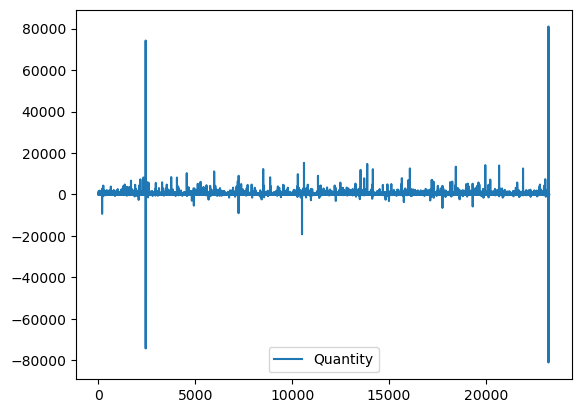

In [8]:
df.plot()

In [9]:
sequences, targets = create_sequences(df, 7)

In [11]:
sequences.shape

(23253, 7, 1)

In [13]:
targets.shape

(23253, 1, 1)